In [4]:
#Kullanacağımız kütüphaneleri içe aktaralım. 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#Verilere erişim
df = pd.read_csv("Desktop/reklam/reklam.csv")
df= df.iloc[:,1:len(df)]
df.head()

,TV,radyo,gazete,satis
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X= df[["TV"]]

In [73]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [74]:
 y=df[["satis"]]

In [75]:
y.head()

,satis
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [76]:
#Modelleme için bir model nesnesi oluşturalım.
reg =LinearRegression()

In [77]:
#Modelimizi fit() metoduyla kuralım. 
model=reg.fit(X,y)

In [78]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#β0 katsayısını çağırmak için:
model.intercept_

array([7.03259355])

In [80]:
#β1 katsayısını çağırmak için:
model.coef_

array([[0.04753664]])

## R Kare


In [81]:
model.score(X,y)

0.611875050850071

In [82]:
#tahmin
model.intercept_+model.coef_*165

array([[14.87613922]])

In [83]:
model.predict([[165]])

array([[14.87613922]])

In [84]:
yeni_veri=[[5],[15],[30]]

In [85]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

In [86]:
#y mizin gerçek değerlerini çağıralım
y.head()

,satis
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [87]:
#Tahmin edilen bir değeri çağıralım 
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [88]:
gercek_y=y[0:10]

In [89]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [90]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [91]:
hatalar

,satis,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [92]:
#Tabloyu isimlendirelim
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [93]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [94]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]

In [95]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [96]:
#Hataların karesi
hatalar["hata_kareler"]=hatalar["hata"]**2

In [97]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [98]:
#Hata kareler ortalaması
np.mean(hatalar["hata_kareler"])

9.290350329638105

# Regresyon Grafiği

Text(0.5, 0, 'TV Harcamaları')

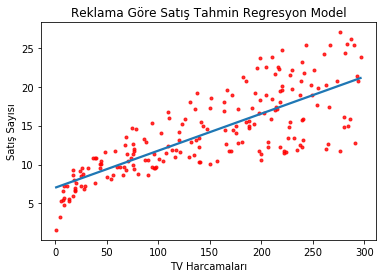

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
g= sns.regplot(df["TV"], df["satis"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Reklama Göre Satış Tahmin Regresyon Model")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")